In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv("AACG.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")
df.reset_index(drop=True, inplace=True)

print("Rows loaded:", len(df))
df.head()

Rows loaded: 261


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-11,1.08,1.10,1.08,1.08,1.08,32100
1,2019-03-12,1.08,1.09,1.05,1.05,1.05,20200
2,2019-03-13,1.06,1.08,1.04,1.07,1.07,23100
3,2019-03-14,1.06,1.11,1.06,1.08,1.08,29900
4,2019-03-15,1.06,1.08,1.04,1.04,1.04,30900


In [4]:
df['return'] = (df['Close'] - df['Open']) / df['Open']
df['ma5'] = df['Close'].rolling(5).mean()
df['ma10'] = df['Close'].rolling(10).mean()
df['ma20'] = df['Close'].rolling(20).mean()
df['vol20'] = df['return'].rolling(20).std()
df['prev_close'] = df['Close'].shift(1)
df['target_next_close'] = df['Close'].shift(-1)
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,return,ma5,ma10,ma20,vol20,prev_close,target_next_close
19,2019-04-05,1.02,1.02,1.00,1.00,1.00,52700,-0.019608,0.998,0.999,1.0255,0.018039,1.00,1.02
20,2019-04-08,1.01,1.02,0.98,1.02,1.02,39600,0.009901,1.002,1.002,1.0225,0.018336,1.00,2.12
21,2019-04-09,1.14,2.54,1.14,2.12,2.12,52444800,0.859649,1.226,1.114,1.0760,0.193909,1.02,3.85
22,2019-04-10,2.57,4.50,2.27,3.85,3.85,53169400,0.498054,1.798,1.397,1.2150,0.219106,2.12,3.05
23,2019-04-11,3.00,3.46,2.85,3.05,3.05,6180700,0.016667,2.208,1.602,1.3135,0.219130,3.85,2.50


In [5]:
features = ['Close','prev_close','return','ma5','ma10','ma20','vol20','Volume']
X = df[features]
y = df['target_next_close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training rows:", len(X_train))
print("Testing rows:", len(X_test))


Training rows: 192
Testing rows: 49


RMSE: 0.4925791439937786


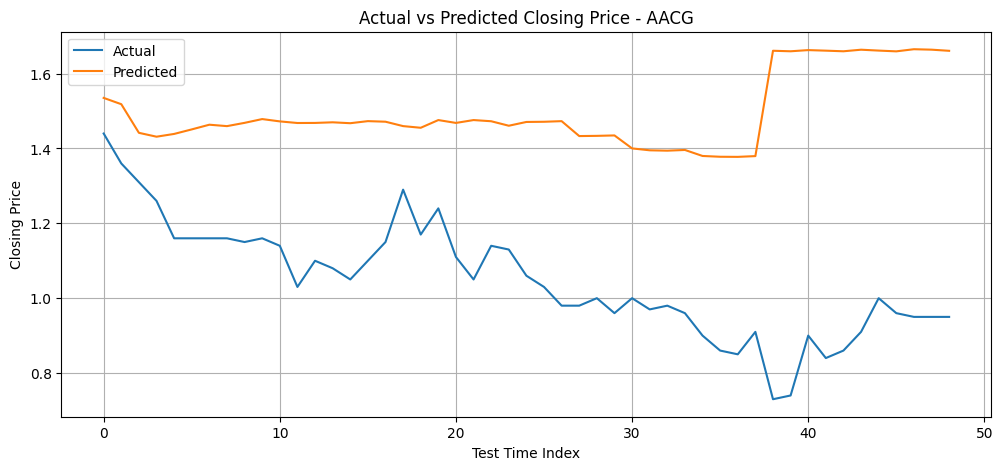

In [8]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)
preds = model.predict(X_test)

rmse = mean_squared_error(y_test, preds) ** 0.5
print("RMSE:", rmse)

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(preds, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Closing Price - AACG")
plt.xlabel("Test Time Index")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

In [11]:
future_df = df.copy()

for i in range(30):
    last_row = future_df.iloc[-1]

    new_row = {}
    new_row['Date'] = last_row['Date'] + pd.Timedelta(days=1)

    new_row['Open'] = last_row['Close']
    new_row['High'] = last_row['Close']
    new_row['Low'] = last_row['Close']
    new_row['Close'] = last_row['Close']
    new_row['Adj Close'] = last_row['Close']
    new_row['Volume'] = last_row['Volume']

    temp = pd.DataFrame([new_row])
    future_df = pd.concat([future_df, temp], ignore_index=True)

    f = future_df.iloc[-1]
    f_prev = future_df.iloc[-2]

    future_df.loc[len(future_df)-1, 'return'] = (f['Close'] - f['Open']) / f['Open']
    future_df['ma5'] = future_df['Close'].rolling(5).mean()
    future_df['ma10'] = future_df['Close'].rolling(10).mean()
    future_df['ma20'] = future_df['Close'].rolling(20).mean()
    future_df['vol20'] = future_df['return'].rolling(20).std()
    future_df['prev_close'] = future_df['Close'].shift(1)

    X_future = future_df[features].iloc[-1:].values
    pred_future = model.predict(X_future)[0]

    future_df.loc[len(future_df)-1, 'Close'] = pred_future
    future_df.loc[len(future_df)-1, 'Adj Close'] = pred_future

future_predictions = future_df.tail(30)[["Date","Close"]]
future_predictions

C:\Users\Mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn

,Date,Close
241,2020-04-01,1.66215
242,2020-04-02,1.77510
243,2020-04-03,1.79905
244,2020-04-04,1.81350
245,2020-04-05,1.82070
246,2020-04-06,1.82240
247,2020-04-07,1.81855
248,2020-04-08,1.81630
249,2020-04-09,1.81945
250,2020-04-10,1.80760


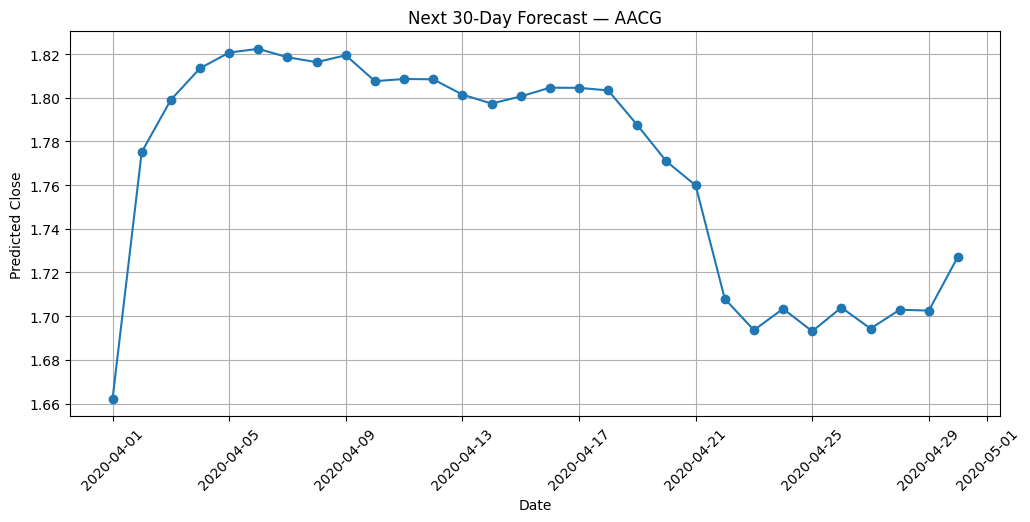

In [10]:
plt.figure(figsize=(12,5))
plt.plot(future_predictions['Date'], future_predictions['Close'], marker='o')
plt.title("Next 30-Day Forecast — AACG")
plt.xlabel("Date")
plt.ylabel("Predicted Close")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
